# INIT

In [1]:
import numpy as np
import pandas as pd
from scipy.integrate import solve_ivp
from matplotlib import pyplot as plt
from plasmistry.electron import EEDF
from plasmistry.electron import get_maxwell_eedf
from plasmistry.molecule import get_ideal_gas_density

In [2]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,9)
plt.rcParams["font.size"] = 17

In [3]:
np.set_printoptions(precision=1, linewidth=130, edgeitems=5)
pd.options.display.float_format = '{:,.1e}'.format

# Read inelas reactions

In [4]:
file_name_list = ['rctn_df_H2_ele_vib_forward.pkl',
                  'rctn_df_H2_e_vib_backward.pkl',
                  'rctn_df_CO2_e_vib_forward.pkl',
                  'rctn_df_CO2_e_vib_backward.pkl',
                  'rctn_df_H2_ele_dis_via_b.pkl',
                  'rctn_df_CO2_ele_diss.pkl']
file_name_list = ['rctn_df_CO2_e_vib_forward.pkl',
                  'rctn_df_CO2_e_vib_backward.pkl']
_df = pd.DataFrame(columns=['formula','type', 'threshold_eV', 'cross_section'])
for file_name in file_name_list:
    _df = _df.append(pd.read_pickle(file_name))
inelas_df = _df
inelas_df['threshold_eV'] = inelas_df['threshold_eV'].astype(float)

# Choose the reactions considered.

In [5]:
# inelas_df = inelas_df.iloc[[0,1,2,3,4,5,6,7,8]].reset_index(drop=True)
# inelas_df = inelas_df.iloc[[0,1,2]].reset_index(drop=True)
inelas_df

formula          type          threshold_eV  \
0          E + CO2 => E + CO2(v1)    EXCITATION    0.2912574773137701   
1          E + CO2 => E + CO2(v2)    EXCITATION    0.5794227887444736   
2          E + CO2 => E + CO2(v3)    EXCITATION    0.8644959342921104   
3          E + CO2 => E + CO2(v4)    EXCITATION    1.1464769139566813   
4          E + CO2 => E + CO2(v5)    EXCITATION    1.4253657277381855   
5          E + CO2 => E + CO2(v6)    EXCITATION     1.701162375636623   
6          E + CO2 => E + CO2(v7)    EXCITATION    1.9738668576519955   
7          E + CO2 => E + CO2(v8)    EXCITATION       2.2434791737843   
8          E + CO2 => E + CO2(v9)    EXCITATION    2.5099993240335396   
9         E + CO2 => E + CO2(v10)    EXCITATION    2.7734273083997114   
10        E + CO2 => E + CO2(v11)    EXCITATION    3.0337631268828176   
11        E + CO2 => E + CO2(v12)    EXCITATION    3.2910067794828572   
12        E + CO2 => E + CO2(v13)    EXCITATION    3.5451582661998304   
13        E + CO2 => E + CO2(v14)    EXCITATION    3.7962175870337367   
14        E + CO2 => E + CO2(v15)    EXCITATION     4.044184741984577   
15        E + CO2 => E + CO2(v16)    EXCITATION     4.289059731052351   
16        E + CO2 => E + CO2(v17)    EXCITATION     4.530842554237059   
17        E + CO2 => E + CO2(v18)    EXCITATION    4.7695332115386995   
18        E + CO2 => E + CO2(v19)    EXCITATION     5.005131702957276   
19        E + CO2 => E + CO2(v20)    EXCITATION     5.237638028492783   
20     E + CO2(v1) => E + CO2(v2)    EXCITATION    0.2881653114307035   
21     E + CO2(v1) => E + CO2(v3)    EXCITATION    0.5732384569783402   
22     E + CO2(v1) => E + CO2(v4)    EXCITATION    0.8552194366429111   
23     E + CO2(v1) => E + CO2(v5)    EXCITATION    1.1341082504244153   
24     E + CO2(v1) => E + CO2(v6)    EXCITATION    1.4099048983228528   
25     E + CO2(v1) => E + CO2(v7)    EXCITATION    1.6826093803382254   
26     E + CO2(v1) => E + CO2(v8)    EXCITATION      1.95222169647053   
27     E + CO2(v1) => E + CO2(v9)    EXCITATION    2.2187418467197695   
28    E + CO2(v1) => E + CO2(v10)    EXCITATION    2.4821698310859412   
29    E + CO2(v1) => E + CO2(v11)    EXCITATION    2.7425056495690474   
..                            ...           ...                   ...   
180   E + CO2(v19) => E + CO2(v9)  DEEXCITATION   -2.4951323789237363   
181  E + CO2(v19) => E + CO2(v10)  DEEXCITATION   -2.2317043945575645   
182  E + CO2(v19) => E + CO2(v11)  DEEXCITATION   -1.9713685760744584   
183  E + CO2(v19) => E + CO2(v12)  DEEXCITATION   -1.7141249234744187   
184  E + CO2(v19) => E + CO2(v13)  DEEXCITATION   -1.4599734367574455   
185  E + CO2(v19) => E + CO2(v14)  DEEXCITATION   -1.2089141159235393   
186  E + CO2(v19) => E + CO2(v15)  DEEXCITATION   -0.9609469609726986   
187  E + CO2(v19) => E + CO2(v16)  DEEXCITATION   -0.7160719719049249   
188  E + CO2(v19) => E + CO2(v17)  DEEXCITATION   -0.4742891487202172   
189  E + CO2(v19) => E + CO2(v18)  DEEXCITATION  -0.23559849141857647   
190       E + CO2(v20) => E + CO2  DEEXCITATION    -5.237638028492783   
191   E + CO2(v20) => E + CO2(v1)  DEEXCITATION    -4.946380551179013   
192   E + CO2(v20) => E + CO2(v2)  DEEXCITATION    -4.658215239748309   
193   E + CO2(v20) => E + CO2(v3)  DEEXCITATION    -4.373142094200673   
194   E + CO2(v20) => E + CO2(v4)  DEEXCITATION    -4.091161114536101   
195   E + CO2(v20) => E + CO2(v5)  DEEXCITATION   -3.8122723007545973   
196   E + CO2(v20) => E + CO2(v6)  DEEXCITATION   -3.5364756528561596   
197   E + CO2(v20) => E + CO2(v7)  DEEXCITATION    -3.263771170840787   
198   E + CO2(v20) => E + CO2(v8)  DEEXCITATION   -2.9941588547084828   
199   E + CO2(v20) => E + CO2(v9)  DEEXCITATION    -2.727638704459243   
200  E + CO2(v20) => E + CO2(v10)  DEEXCITATION   -2.4642107200930714   
201  E + CO2(v20) => E + CO2(v11)  DEEXCITATION   -2.2038749016099652   
202  E + CO2(v20) => E + CO2(v12)  DEEXCITATION   -1.9466312490099256   
203  E + CO

limit_output extension: Maximum message size of 10000 exceeded with 13126 characters

# Init EEDF

In [8]:
eedf = EEDF(max_energy_eV=30, grid_number=600)
total_species = ['E','H2','CO2'] + [f'H2(v{v})' for v in range(1, 15)] + [f'CO2(v{v})' for v in range(1, 22)]

In [9]:
eedf.initialize(rctn_with_crostn_df=inelas_df, total_species=total_species)

## properties

In [10]:
eedf.rate_const_matrix_e_inelas_electron.toarray()

array([[ 0.0e+00,  0.0e+00,  0.0e+00,  0.0e+00,  0.0e+00, ...,  0.0e+00,  0.0e+00,  0.0e+00,  0.0e+00,  0.0e+00],
       [ 0.0e+00,  0.0e+00,  0.0e+00,  0.0e+00,  0.0e+00, ...,  0.0e+00,  0.0e+00,  0.0e+00,  0.0e+00,  0.0e+00],
       [ 0.0e+00,  0.0e+00,  0.0e+00,  0.0e+00,  0.0e+00, ...,  0.0e+00,  0.0e+00,  0.0e+00,  0.0e+00,  0.0e+00],
       [ 0.0e+00,  0.0e+00,  0.0e+00,  0.0e+00,  0.0e+00, ...,  0.0e+00,  0.0e+00,  0.0e+00,  0.0e+00,  0.0e+00],
       [ 0.0e+00,  0.0e+00,  0.0e+00,  0.0e+00,  0.0e+00, ...,  0.0e+00,  0.0e+00,  0.0e+00,  0.0e+00,  0.0e+00],
       ...,
       [ 0.0e+00,  0.0e+00,  0.0e+00,  0.0e+00,  0.0e+00, ..., -8.5e-15,  0.0e+00,  0.0e+00,  0.0e+00,  0.0e+00],
       [ 0.0e+00,  0.0e+00,  0.0e+00,  0.0e+00,  0.0e+00, ...,  0.0e+00, -8.5e-15,  0.0e+00,  0.0e+00,  0.0e+00],
       [ 0.0e+00,  0.0e+00,  0.0e+00,  0.0e+00,  0.0e+00, ...,  0.0e+00,  0.0e+00, -8.5e-15,  0.0e+00,  0.0e+00],
       [ 0.0e+00,  0.0e+00,  0.0e+00,  0.0e+00,  0.0e+00, ...,  0.0e+00,  0.

In [11]:
eedf.rate_const_matrix_e_inelas_electron.shape

(12600, 600)

In [12]:
eedf.rate_const_matrix_e_inelas_molecule.shape

(420, 600)

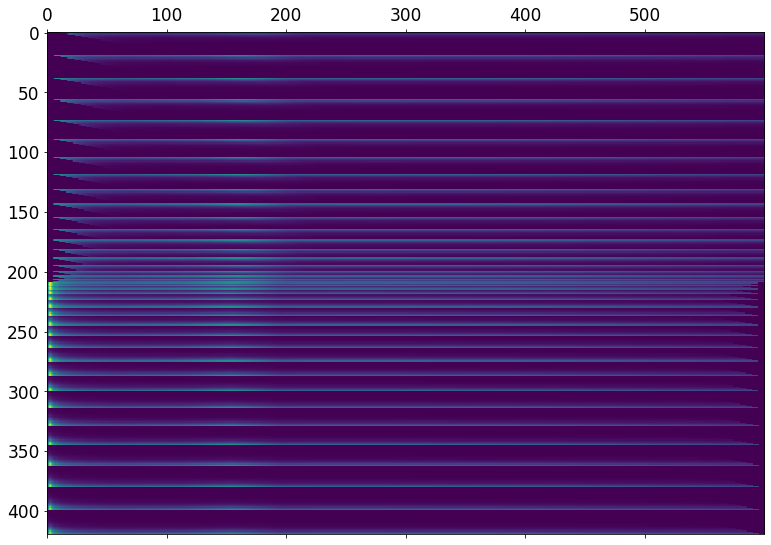

In [13]:
plt.matshow(eedf.rate_const_matrix_e_inelas_molecule)

In [14]:
eedf.n_bg_molecule_elas

2

In [15]:
eedf.bg_molecule_elas

['H2', 'CO2']

In [16]:
eedf.n_bg_molecule_inelas

21

In [17]:
eedf.bg_molecule_inelas

array(['CO2', 'CO2(v1)', 'CO2(v10)', 'CO2(v11)', 'CO2(v12)', 'CO2(v13)', 'CO2(v14)', 'CO2(v15)', 'CO2(v16)', 'CO2(v17)',
       'CO2(v18)', 'CO2(v19)', 'CO2(v2)', 'CO2(v20)', 'CO2(v3)', 'CO2(v4)', 'CO2(v5)', 'CO2(v6)', 'CO2(v7)', 'CO2(v8)',
       'CO2(v9)'], dtype=object)

In [18]:
eedf.n_inelas_rctn

420

In [19]:
eedf.bg_molecule_inelas_in_order

array(['CO2', 'CO2', 'CO2', 'CO2', 'CO2', 'CO2', 'CO2', 'CO2', 'CO2', 'CO2', 'CO2', 'CO2', 'CO2', 'CO2', 'CO2', 'CO2', 'CO2',
       'CO2', 'CO2', 'CO2', 'CO2(v1)', 'CO2(v1)', 'CO2(v1)', 'CO2(v1)', 'CO2(v1)', 'CO2(v1)', 'CO2(v1)', 'CO2(v1)', 'CO2(v1)',
       'CO2(v1)', 'CO2(v1)', 'CO2(v1)', 'CO2(v1)', 'CO2(v1)', 'CO2(v1)', 'CO2(v1)', 'CO2(v1)', 'CO2(v1)', 'CO2(v1)', 'CO2(v2)',
       'CO2(v2)', 'CO2(v2)', 'CO2(v2)', 'CO2(v2)', 'CO2(v2)', 'CO2(v2)', 'CO2(v2)', 'CO2(v2)', 'CO2(v2)', 'CO2(v2)', 'CO2(v2)',
       'CO2(v2)', 'CO2(v2)', 'CO2(v2)', 'CO2(v2)', 'CO2(v2)', 'CO2(v2)', 'CO2(v3)', 'CO2(v3)', 'CO2(v3)', 'CO2(v3)', 'CO2(v3)',
       'CO2(v3)', 'CO2(v3)', 'CO2(v3)', 'CO2(v3)', 'CO2(v3)', 'CO2(v3)', 'CO2(v3)', 'CO2(v3)', 'CO2(v3)', 'CO2(v3)', 'CO2(v3)',
       'CO2(v3)', 'CO2(v4)', 'CO2(v4)', 'CO2(v4)', 'CO2(v4)', 'CO2(v4)', 'CO2(v4)', 'CO2(v4)', 'CO2(v4)', 'CO2(v4)', 'CO2(v4)',
       'CO2(v4)', 'CO2(v4)', 'CO2(v4)', 'CO2(v4)', 'CO2(v4)', 'CO2(v4)', 'CO2(v5)', 'CO2(v5)', 'CO2(v5)', '

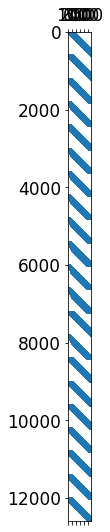

In [20]:
plt.spy(eedf.rate_const_matrix_e_inelas_electron, markersize=2)

In [21]:
eedf.rate_const_matrix_e_inelas_molecule

array([[0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, ..., 2.6e-35, 2.6e-35, 2.6e-35, 2.6e-35, 2.6e-35],
       [0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, ..., 1.6e-35, 1.6e-35, 1.6e-35, 1.6e-35, 1.6e-35],
       [0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, ..., 1.0e-35, 1.0e-35, 1.0e-35, 1.0e-35, 1.0e-35],
       [0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, ..., 6.2e-36, 6.2e-36, 6.2e-36, 6.2e-36, 6.2e-36],
       [0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, ..., 3.8e-36, 3.8e-36, 3.8e-36, 3.8e-36, 3.8e-36],
       ...,
       [7.1e-36, 3.7e-35, 5.5e-35, 4.5e-35, 3.6e-35, ..., 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00],
       [9.5e-36, 5.0e-35, 7.4e-35, 6.1e-35, 4.9e-35, ..., 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00],
       [1.2e-35, 6.3e-35, 9.4e-35, 7.9e-35, 6.4e-35, ..., 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00],
       [1.4e-35, 7.3e-35, 1.1e-34, 9.4e-35, 7.8e-35, ..., 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00],
       [1.4e-35, 7.0e-35, 1.1e-34, 9.6e-35, 8.0e-35,

# Set parameters

In [49]:
N = get_ideal_gas_density(p_Pa=1e5, Tgas_K=3500)
eedf.set_parameters(E=1200/0.01, Tgas=3500, N=N)

In [50]:
total_species_density = np.ones(len(total_species))* N
# total_species_density = np.array([0,1,0,0,0])*N
def dndt_all(t, y):
    eedf.set_density_per_J(y)
    eedf.set_flux(total_species_density=total_species_density)
    return eedf.get_deriv_total(total_species_density=total_species_density) 

In [51]:
y0 = get_maxwell_eedf(eedf.energy_point, Te_eV=0.7)*1e20
time_span = [0, 1e3]
sol = solve_ivp(dndt_all, time_span, y0, method="BDF")

In [52]:
len(sol.t)

178

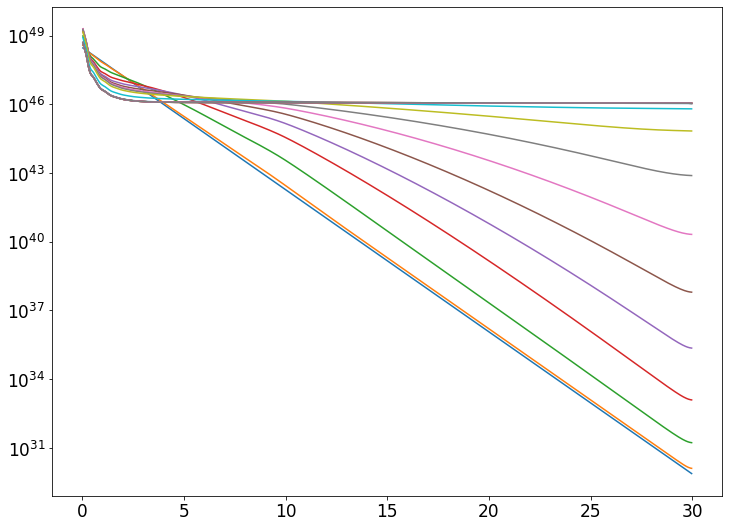

In [53]:
plt.semilogy(eedf.energy_point_eV, (sol.y.transpose()/np.sqrt(eedf.energy_point)).transpose()[:,::10])

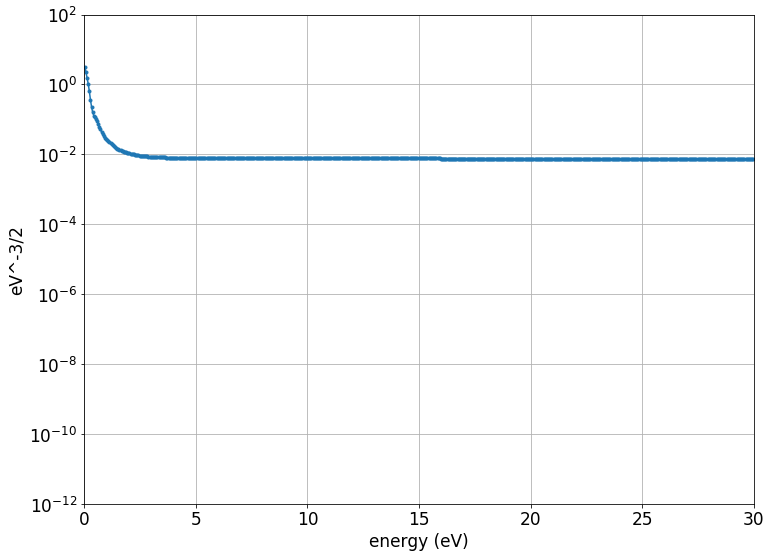

In [56]:
eedf.set_density_per_J(sol.y[:,-1])
eedf.plot_normalized_eepf(xlim=(0,30), ylim=(1e-12, 1e2))


In [57]:
np.savetxt('output.dat', np.vstack((eedf.energy_point_eV, eedf.normalized_eepf_eV)).transpose())

In [58]:
print(eedf)


        
        
               ENERGY SPACE (eV) : (0.0, 30.0)
        
     NUMBER OF DISCRETIZED CELLS : 600 cells
        
            ENERGY INTERVAL (eV) : 0.050 
        
        
            ELECTRON TEMPERATURE : 9.8688 eV
        
            ELECTRON MEAN ENERGY : 14.8033 eV
        
                ELECTRON DENSITY : 9.94e+19 m^-3
        
        
              ELECTRIC FIELD (E) : 120000 V/m (1.20 kV/cm) 
        
          GAS TEMPERATURE (Tgas) : 3500 K
        
 BACKGROUND MOLECULE DENSITY (N) : 2.1e+24 m^-3
        
    REDUCED ELECTRIC FIELD (E/N) : 58.0 Td
        
        
     ELASTIC COLLISION MOLECULES : ['H2', 'CO2']
        
   INELASTIC COLLISION MOLECULES : ['CO2' 'CO2(v1)' 'CO2(v10)' 'CO2(v11)' 'CO2(v12)' 'CO2(v13)' 'CO2(v14)' 'CO2(v15)' 'CO2(v16)' 'CO2(v17)' 'CO2(v18)' 'CO2(v19)'
 'CO2(v2)' 'CO2(v20)' 'CO2(v3)' 'CO2(v4)' 'CO2(v5)' 'CO2(v6)' 'CO2(v7)' 'CO2(v8)' 'CO2(v9)']
        


In [59]:
eedf._get_molecule_rate_const_e_inelas()

array([4.3e-15, 2.6e-15, 1.6e-15, 9.5e-16, 5.8e-16, 3.6e-16, 2.2e-16, 1.3e-16, 8.3e-17, 5.1e-17, 3.1e-17, 1.9e-17, 1.2e-17,
       7.2e-18, 4.4e-18, 2.7e-18, 1.7e-18, 1.0e-18, 6.2e-19, 3.8e-19, 4.3e-15, 2.6e-15, 1.6e-15, 9.5e-16, 5.8e-16, 3.6e-16,
       2.2e-16, 1.3e-16, 8.3e-17, 5.1e-17, 3.1e-17, 1.9e-17, 1.2e-17, 7.2e-18, 4.4e-18, 2.7e-18, 1.7e-18, 1.0e-18, 6.2e-19,
       4.3e-15, 2.6e-15, 1.6e-15, 9.5e-16, 5.8e-16, 3.6e-16, 2.2e-16, 1.3e-16, 8.3e-17, 5.1e-17, 3.1e-17, 1.9e-17, 1.2e-17,
       7.2e-18, 4.4e-18, 2.7e-18, 1.7e-18, 1.0e-18, 4.3e-15, 2.6e-15, 1.6e-15, 9.5e-16, 5.8e-16, 3.6e-16, 2.2e-16, 1.3e-16,
       8.2e-17, 5.1e-17, 3.1e-17, 1.9e-17, 1.2e-17, 7.2e-18, 4.4e-18, 2.7e-18, 1.6e-18, 4.3e-15, 2.6e-15, 1.6e-15, 9.5e-16,
       5.8e-16, 3.6e-16, 2.2e-16, 1.3e-16, 8.2e-17, 5.1e-17, 3.1e-17, 1.9e-17, 1.2e-17, 7.2e-18, 4.4e-18, 2.7e-18, 4.3e-15,
       2.6e-15, 1.6e-15, 9.5e-16, 5.8e-16, 3.6e-16, 2.2e-16, 1.3e-16, 8.2e-17, 5.0e-17, 3.1e-17, 1.9e-17, 1.2e-17, 7.1e-18,
       4

In [60]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.barh(range(eedf.n_inelas_rctn),
        width=eedf._get_molecule_rate_const_e_inelas(),
        height=0.6, log=True)
ax.set_yticks(range(eedf.n_inelas_rctn))
ax.set_yticklabels(eedf.inelas_reaction_dataframe['formula'])

[Text(0, 0, 'E + CO2 => E + CO2(v1)'),
 Text(0, 0, 'E + CO2 => E + CO2(v2)'),
 Text(0, 0, 'E + CO2 => E + CO2(v3)'),
 Text(0, 0, 'E + CO2 => E + CO2(v4)'),
 Text(0, 0, 'E + CO2 => E + CO2(v5)'),
 Text(0, 0, 'E + CO2 => E + CO2(v6)'),
 Text(0, 0, 'E + CO2 => E + CO2(v7)'),
 Text(0, 0, 'E + CO2 => E + CO2(v8)'),
 Text(0, 0, 'E + CO2 => E + CO2(v9)'),
 Text(0, 0, 'E + CO2 => E + CO2(v10)'),
 Text(0, 0, 'E + CO2 => E + CO2(v11)'),
 Text(0, 0, 'E + CO2 => E + CO2(v12)'),
 Text(0, 0, 'E + CO2 => E + CO2(v13)'),
 Text(0, 0, 'E + CO2 => E + CO2(v14)'),
 Text(0, 0, 'E + CO2 => E + CO2(v15)'),
 Text(0, 0, 'E + CO2 => E + CO2(v16)'),
 Text(0, 0, 'E + CO2 => E + CO2(v17)'),
 Text(0, 0, 'E + CO2 => E + CO2(v18)'),
 Text(0, 0, 'E + CO2 => E + CO2(v19)'),
 Text(0, 0, 'E + CO2 => E + CO2(v20)'),
 Text(0, 0, 'E + CO2(v1) => E + CO2(v2)'),
 Text(0, 0, 'E + CO2(v1) => E + CO2(v3)'),
 Text(0, 0, 'E + CO2(v1) => E + CO2(v4)'),
 Text(0, 0, 'E + CO2(v1) => E + CO2(v5)'),
 Text(0, 0, 'E + CO2(v1) => E + CO2(v

limit_output extension: Maximum message size of 10000 exceeded with 18339 characters

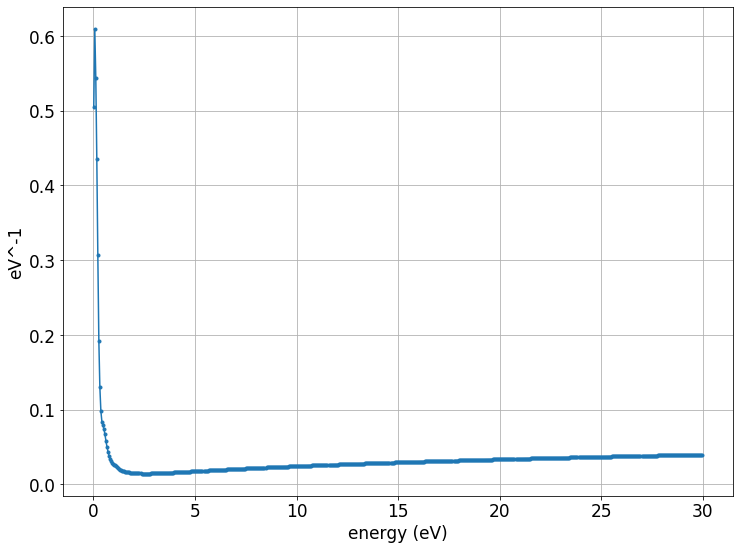

In [61]:
eedf.plot_normalized_eedf()

Text(0.5, 1.0, 'Te vs. t')

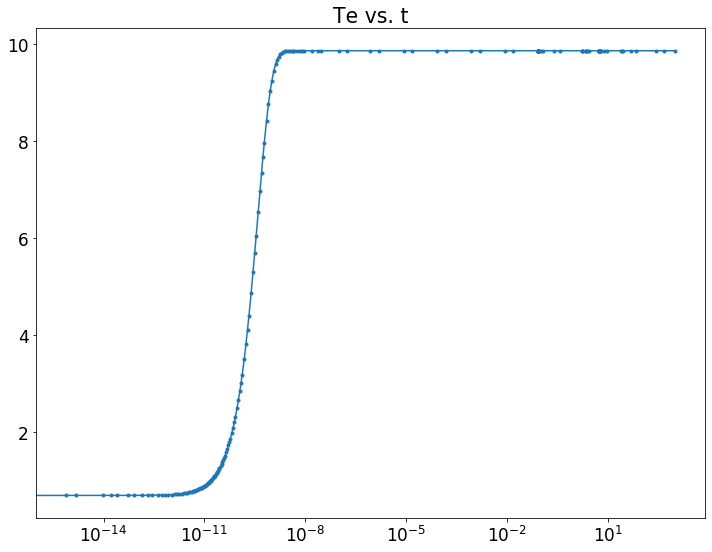

In [62]:
Te_seq = []
ne_seq = []
for _array in sol.y.transpose():
    eedf.set_density_per_J(_array)
    Te_seq.append(eedf.electron_temperature_in_eV)
    ne_seq.append(eedf.electron_density)
plt.semilogx(sol.t, Te_seq, marker='.')
plt.title("Te vs. t")

Text(0.5, 1.0, 'ne vs. t')

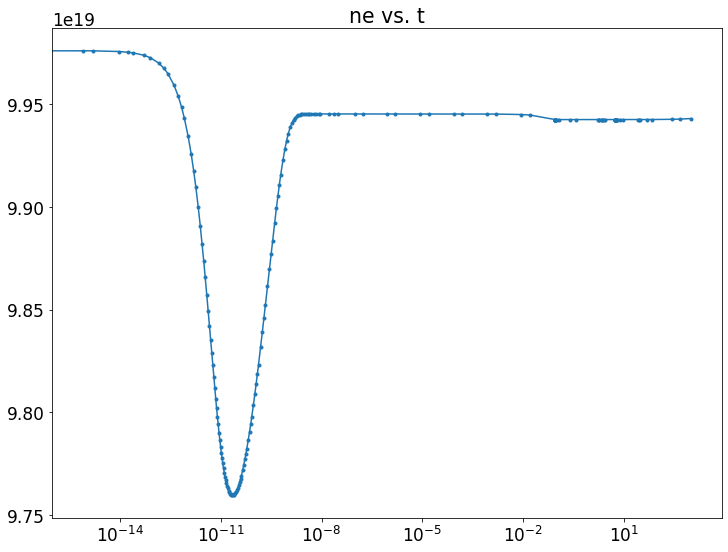

In [63]:
plt.semilogx(sol.t, ne_seq, marker='.')
plt.title("ne vs. t")

In [64]:
sol.y

array([[1.8e+38, 1.8e+38, 1.8e+38, 1.9e+38, 1.9e+38, ..., 3.1e+38, 3.1e+38, 3.1e+38, 3.1e+38, 3.1e+38],
       [3.0e+38, 3.0e+38, 3.0e+38, 3.0e+38, 3.0e+38, ..., 3.8e+38, 3.8e+38, 3.8e+38, 3.8e+38, 3.8e+38],
       [3.6e+38, 3.6e+38, 3.6e+38, 3.6e+38, 3.6e+38, ..., 3.4e+38, 3.4e+38, 3.4e+38, 3.4e+38, 3.4e+38],
       [3.9e+38, 3.9e+38, 3.9e+38, 3.9e+38, 4.0e+38, ..., 2.7e+38, 2.7e+38, 2.7e+38, 2.7e+38, 2.7e+38],
       [4.1e+38, 4.1e+38, 4.1e+38, 4.2e+38, 4.2e+38, ..., 1.9e+38, 1.9e+38, 1.9e+38, 1.9e+38, 1.9e+38],
       ...,
       [2.2e+21, 2.2e+21, 2.2e+21, 2.2e+21, 2.3e+21, ..., 2.4e+37, 2.4e+37, 2.4e+37, 2.4e+37, 2.4e+37],
       [2.1e+21, 2.1e+21, 2.1e+21, 2.1e+21, 2.1e+21, ..., 2.4e+37, 2.4e+37, 2.4e+37, 2.4e+37, 2.4e+37],
       [1.9e+21, 1.9e+21, 1.9e+21, 1.9e+21, 2.0e+21, ..., 2.4e+37, 2.4e+37, 2.4e+37, 2.4e+37, 2.4e+37],
       [1.8e+21, 1.8e+21, 1.8e+21, 1.8e+21, 1.9e+21, ..., 2.4e+37, 2.4e+37, 2.4e+37, 2.4e+37, 2.4e+37],
       [1.7e+21, 1.7e+21, 1.7e+21, 1.7e+21, 1.8e+21,

In [65]:
eedf.set_density_per_J(sol.y[:,-1])
eedf.set_flux(total_species_density=total_species_density)

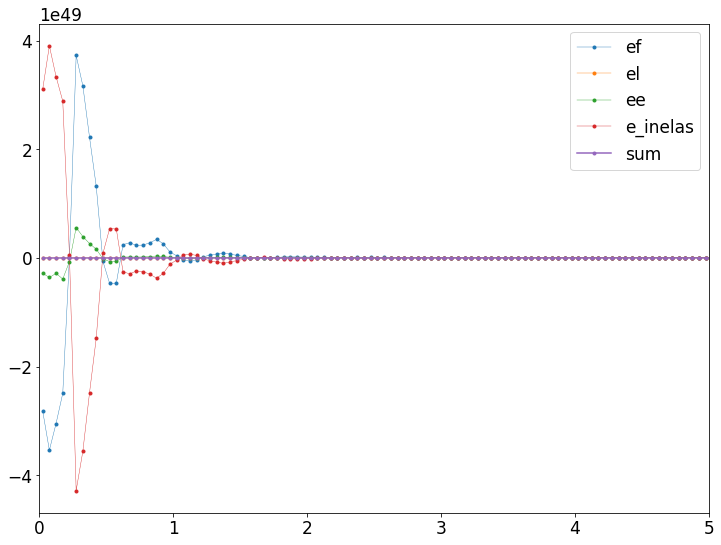

In [74]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(eedf.energy_point_eV, eedf._get_deriv_ef(), 
        linewidth=0.4, marker='.', label='ef')
ax.plot(eedf.energy_point_eV, eedf._get_deriv_el(), 
        linewidth=0.4, marker='.', label='el')
ax.plot(eedf.energy_point_eV, eedf._get_deriv_ee(), 
        linewidth=0.4, marker='.', label='ee')
ax.plot(eedf.energy_point_eV, eedf._get_electron_rate_e_inelas(density=total_species_density), 
        linewidth=0.4, marker='.', label='e_inelas')
ax.plot(eedf.energy_point_eV, eedf.get_deriv_total(total_species_density=total_species_density), 
        linewidth=1.5, marker='.', label='sum')
# ax.plot(eedf.energy_nodes,eedf.J_flux_el, marker='.', label='el')
# ax.plot(eedf.energy_nodes,eedf.J_flux_ee, marker='.', label='ee')
# ax.plot(eedf.energy_nodes,eedf.J_flux_ef+eedf.J_flux_el+eedf.J_flux_ee, marker='.', label='ef+el+ee')
# ax.set_yscale('symlog')
# ax.set_xscale('log')
ax.set_xlim((0,5))
ax.legend()

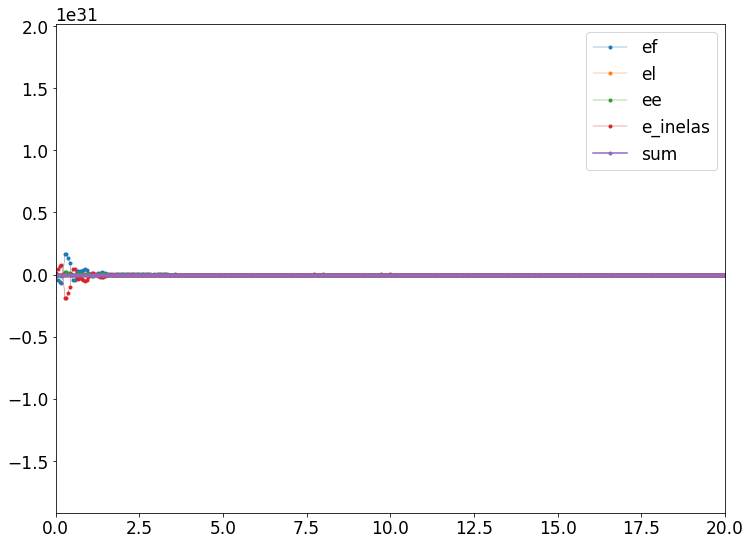

In [67]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(eedf.energy_point_eV, eedf._get_deriv_ef()*eedf.energy_point, 
        linewidth=0.4, marker='.', label='ef')
ax.plot(eedf.energy_point_eV, eedf._get_deriv_el()*eedf.energy_point, 
        linewidth=0.4, marker='.', label='el')
ax.plot(eedf.energy_point_eV, eedf._get_deriv_ee()*eedf.energy_point, 
        linewidth=0.4, marker='.', label='ee')
ax.plot(eedf.energy_point_eV, eedf._get_electron_rate_e_inelas(density=total_species_density)*eedf.energy_point, 
        linewidth=0.4, marker='.', label='e_inelas')
ax.plot(eedf.energy_point_eV, eedf.get_deriv_total(total_species_density=total_species_density)*eedf.energy_point, 
        linewidth=1.5, marker='.', label='sum')
# ax.plot(eedf.energy_nodes,eedf.J_flux_el, marker='.', label='el')
# ax.plot(eedf.energy_nodes,eedf.J_flux_ee, marker='.', label='ee')
# ax.plot(eedf.energy_nodes,eedf.J_flux_ef+eedf.J_flux_el+eedf.J_flux_ee, marker='.', label='ef+el+ee')
# ax.set_yscale('symlog')
# ax.set_xscale('log')
ax.set_xlim((0,20))
ax.legend()

In [68]:
energy_gain_ef = (eedf._get_deriv_ef()*eedf.energy_point).sum()
energy_lose_el = (eedf._get_deriv_el()*eedf.energy_point).sum()
energy_gain_ee = (eedf._get_deriv_ee()*eedf.energy_point).sum()
energy_gain_e_inelas = (eedf._get_electron_rate_e_inelas(density=total_species_density)*eedf.energy_point).sum()
energy_gain_net = (eedf.get_deriv_total(total_species_density=total_species_density)*eedf.energy_point).sum()

Text(0.5, 1.0, 'Energy Gain')

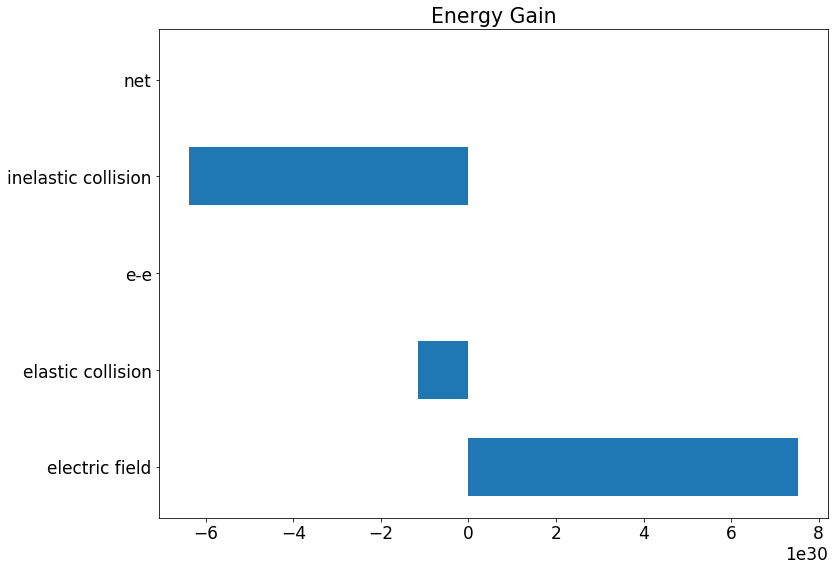

In [69]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.barh(range(5),
        width=[energy_gain_ef, energy_lose_el, energy_gain_ee, energy_gain_e_inelas, energy_gain_net],
       height=0.6)
ax.set_yticks(range(5))
ax.set_yticklabels(['electric field', 'elastic collision', 'e-e', 'inelastic collision', 'net'])
ax.set_title("Energy Gain")

In [70]:
result_df = eedf.inelas_rctn_info
result_df.sort_values(by=['rate const'], ascending=False).head()

formula          type  threshold_eV  rate const  \
210      E + CO2(v1) => E + CO2  DEEXCITATION      -2.9e-01     5.7e-15   
212  E + CO2(v2) => E + CO2(v1)  DEEXCITATION      -2.9e-01     5.7e-15   
215  E + CO2(v3) => E + CO2(v2)  DEEXCITATION      -2.9e-01     5.7e-15   
219  E + CO2(v4) => E + CO2(v3)  DEEXCITATION      -2.8e-01     5.7e-15   
224  E + CO2(v5) => E + CO2(v4)  DEEXCITATION      -2.8e-01     5.6e-15   

     energy lose  
210     -1.7e-15  
212     -1.6e-15  
215     -1.6e-15  
219     -1.6e-15  
224     -1.6e-15

In [71]:
result_df[result_df['type']=='EXCITATION'].sort_values(by=['rate const'], ascending=False)

formula        type  threshold_eV  rate const  \
209  E + CO2(v19) => E + CO2(v20)  EXCITATION       2.3e-01     4.3e-15   
207  E + CO2(v18) => E + CO2(v19)  EXCITATION       2.4e-01     4.3e-15   
204  E + CO2(v17) => E + CO2(v18)  EXCITATION       2.4e-01     4.3e-15   
200  E + CO2(v16) => E + CO2(v17)  EXCITATION       2.4e-01     4.3e-15   
195  E + CO2(v15) => E + CO2(v16)  EXCITATION       2.4e-01     4.3e-15   
189  E + CO2(v14) => E + CO2(v15)  EXCITATION       2.5e-01     4.3e-15   
182  E + CO2(v13) => E + CO2(v14)  EXCITATION       2.5e-01     4.3e-15   
174  E + CO2(v12) => E + CO2(v13)  EXCITATION       2.5e-01     4.3e-15   
165  E + CO2(v11) => E + CO2(v12)  EXCITATION       2.6e-01     4.3e-15   
155  E + CO2(v10) => E + CO2(v11)  EXCITATION       2.6e-01     4.3e-15   
144   E + CO2(v9) => E + CO2(v10)  EXCITATION       2.6e-01     4.3e-15   
132    E + CO2(v8) => E + CO2(v9)  EXCITATION       2.7e-01     4.3e-15   
119    E + CO2(v7) => E + CO2(v8)  EXCITATION       2.7e-01     4.3e-15   
105    E + CO2(v6) => E + CO2(v7)  EXCITATION       2.7e-01     4.3e-15   
90     E + CO2(v5) => E + CO2(v6)  EXCITATION       2.8e-01     4.3e-15   
74     E + CO2(v4) => E + CO2(v5)  EXCITATION       2.8e-01     4.3e-15   
57     E + CO2(v3) => E + CO2(v4)  EXCITATION       2.8e-01     4.3e-15   
39     E + CO2(v2) => E + CO2(v3)  EXCITATION       2.9e-01     4.3e-15   
20     E + CO2(v1) => E + CO2(v2)  EXCITATION       2.9e-01     4.3e-15   
0          E + CO2 => E + CO2(v1)  EXCITATION       2.9e-01     4.3e-15   
208  E + CO2(v18) => E + CO2(v20)  EXCITATION       4.7e-01     2.6e-15   
205  E + CO2(v17) => E + CO2(v19)  EXCITATION       4.7e-01     2.6e-15   
201  E + CO2(v16) => E + CO2(v18)  EXCITATION       4.8e-01     2.6e-15   
183  E + CO2(v13) => E + CO2(v15)  EXCITATION       5.0e-01     2.6e-15   
196  E + CO2(v15) => E + CO2(v17)  EXCITATION       4.9e-01     2.6e-15   
190  E + CO2(v14) => E + CO2(v16)  EXCITATION       4.9e-01     2.6e-15   
175  E + CO2(v12) => E + CO2(v14)  EXCITATION       5.1e-01     2.6e-15   
166  E + CO2(v11) => E + CO2(v13)  EXCITATION       5.1e-01     2.6e-15   
156  E + CO2(v10) => E + CO2(v12)  EXCITATION       5.2e-01     2.6e-15   
145   E + CO2(v9) => E + CO2(v11)  EXCITATION       5.2e-01     2.6e-15   
..                            ...         ...           ...         ...   
117   E + CO2(v6) => E + CO2(v19)  EXCITATION       3.3e+00     1.2e-17   
131   E + CO2(v7) => E + CO2(v20)  EXCITATION       3.3e+00     1.2e-17   
13        E + CO2 => E + CO2(v14)  EXCITATION       3.8e+00     7.2e-18   
33    E + CO2(v1) => E + CO2(v15)  EXCITATION       3.8e+00     7.2e-18   
52    E + CO2(v2) => E + CO2(v16)  EXCITATION       3.7e+00     7.2e-18   
70    E + CO2(v3) => E + CO2(v17)  EXCITATION       3.7e+00     7.2e-18   
87    E + CO2(v4) => E + CO2(v18)  EXCITATION       3.6e+00     7.2e-18   
103   E + CO2(v5) => E + CO2(v19)  EXCITATION       3.6e+00     7.1e-18   
118   E + CO2(v6) => E + CO2(v20)  EXCITATION       3.5e+00     7.1e-18   
14        E + CO2 => E + CO2(v15)  EXCITATION       4.0e+00     4.4e-18   
34    E + CO2(v1) => E + CO2(v16)  EXCITATION       4.0e+00     4.4e-18   
53    E + CO2(v2) => E + CO2(v17)  EXCITATION       4.0e+00     4.4e-18   
71    E + CO2(v3) => E + CO2(v18)  EXCITATION       3.9e+00     4.4e-18   
88    E + CO2(v4) => E + CO2(v19)  EXCITATION       3.9e+00     4.4e-18   
104   E + CO2(v5) => E + CO2(v20)  EXCITATION       3.8e+00     4.4e-18   
15        E + CO2 => E + CO2(v16)  EXCITATION       4.3e+00     2.7e-18   
35    E + CO2(v1) => E + CO2(v17)  EXCITATION       4.2e+00     2.7e-18   
54    E + CO2(v2) => E + CO2(v18)  EXCITATION       4.2e+00     2.7e-18   
72    E + CO2(v3) => E + CO2(v19)  EXCITATION       4.1e+00     2.7e-18   
89    E + CO2(v4) => E + CO2(v20)  EXCITATION       4.1e+00     2.7e-18   
16        E + CO2 => E + CO2(v17)  EXCITATION       4.5e+00     1.7e-18   
36    E + CO2(v1) => E + CO2(v18)  EXCITATION      

limit_output extension: Maximum message size of 10000 exceeded with 11362 characters

In [72]:
result_df[result_df['formula'].str.endswith('E + H + H')].sort_values(by=['rate const'], ascending=False)

Empty DataFrame
Columns: [formula, type, threshold_eV, rate const, energy lose]
Index: []

In [73]:
result_df[result_df['formula'].str.endswith('E + CO + O')].sort_values(by=['rate const'], ascending=False)

Empty DataFrame
Columns: [formula, type, threshold_eV, rate const, energy lose]
Index: []